# Setup

In [1]:
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

# Keras

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape, Resizing
from tensorflow.keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

# Additional

In [3]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
from keras.utils import to_categorical

# Data Loading

In [36]:
from keras.datasets import mnist


# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()



# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))



# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


## Visualization

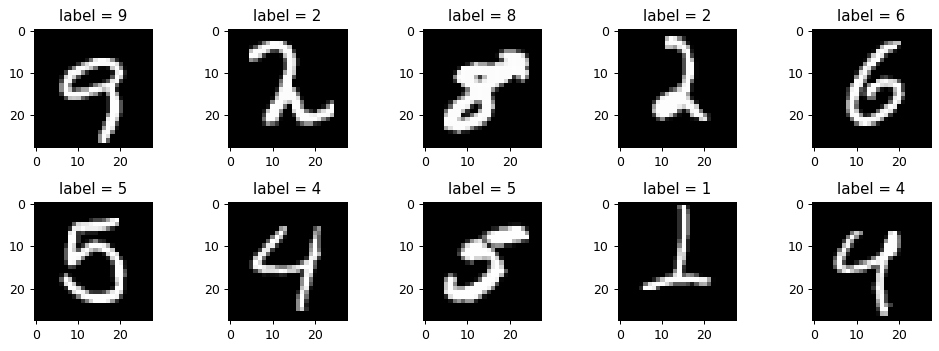

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 4), dpi=90)
indxs = np.random.randint(0, x_train.shape[0], 10)

for i in range(2):
    for j in range(5) :
        axes[i, j].imshow(x_train[indxs[i*5 + j]], cmap='gray')
        axes[i, j].set_title(f'label = {y_train[indxs[i*5 + j]]}')

fig.tight_layout()
plt.show()

In [37]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [38]:
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [39]:
# resize and normalize
# x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
# x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

# Model Structure - CNN

### CONFIG

In [45]:
EPOCHS = 10
BATCH_SIZE = 128

filter_sizes = [(3, 3), (5, 5)]
filter_nums = [32, 64]

## Flatten or what?

After feature extraction by CNN we have to give a 1-D vector to our Dense (fully-conncted) layers for classification task, however it is important how we convert the features into a 1-D vectors.

There might be several ways but the two most common ways are using **`Flatten()`** by turning the whole `(w, h, d)` into `w*h*d` and giving it to the Dense layers.

Another way is using ***`GlobalMaxPooling()`*** which in each pixel takes the maximum of all the values through *depth*, so it takes `(w, h, d)` and gives us a `(w, h)` then we can Flatten() to get the final dimension of `w*d`.

In this report we used the first method.

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_17 (Ba  (None, 26, 26, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_23 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 batch_normalization_18 (Ba  (None, 11, 11, 32)      

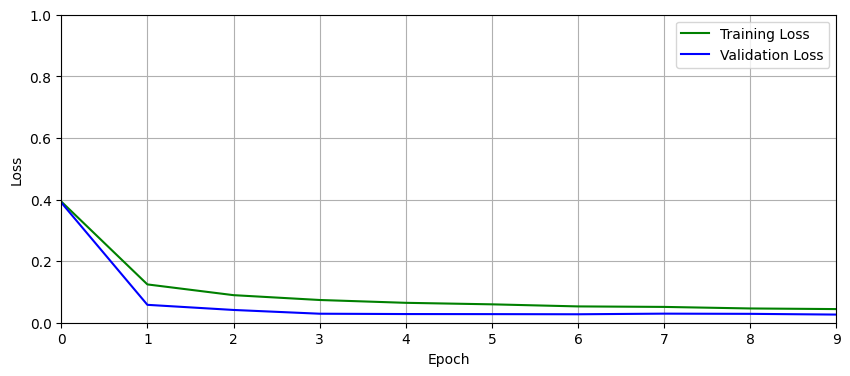

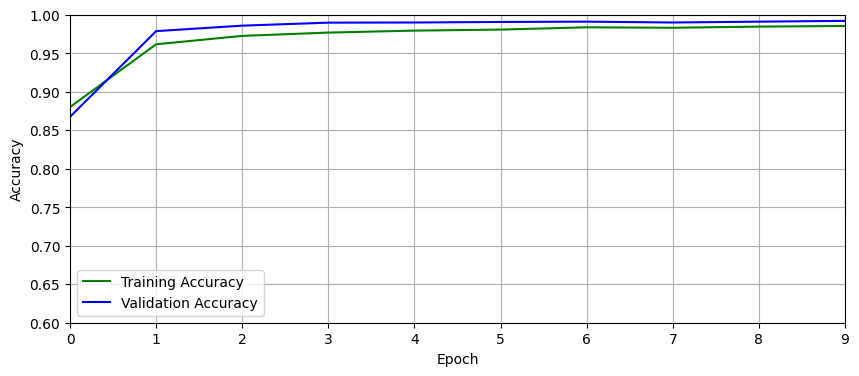

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_19 (Ba  (None, 26, 26, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_25 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_20 (Ba  (None, 11, 11, 64)      

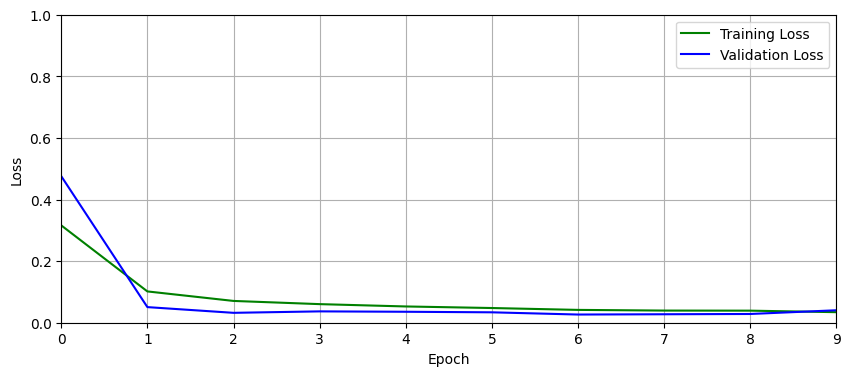

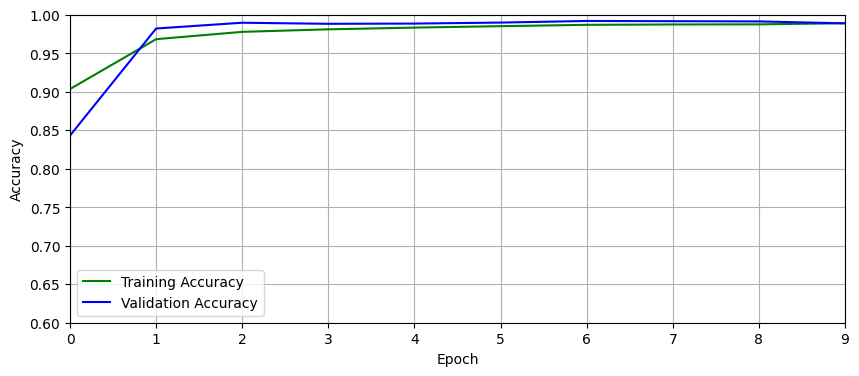

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_21 (Ba  (None, 26, 26, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_27 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 9, 9, 32)          25632     
                                                                 
 batch_normalization_22 (Ba  (None, 9, 9, 32)        

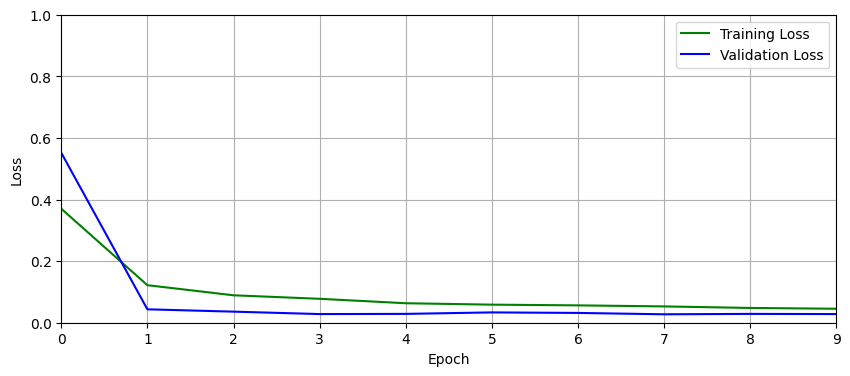

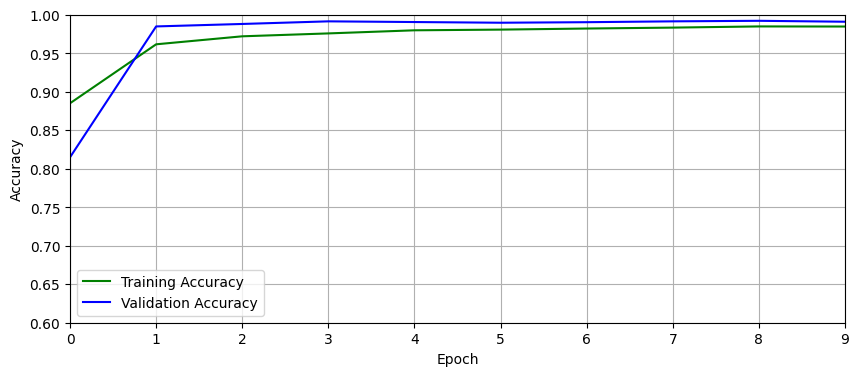

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_23 (Ba  (None, 26, 26, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_29 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 9, 9, 64)          51264     
                                                                 
 batch_normalization_24 (Ba  (None, 9, 9, 64)        

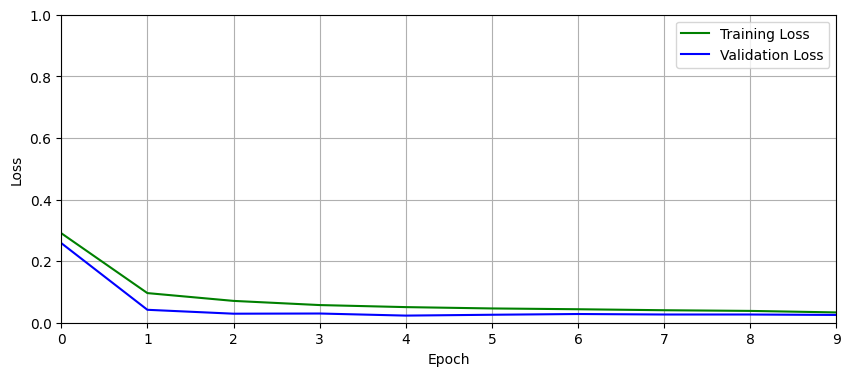

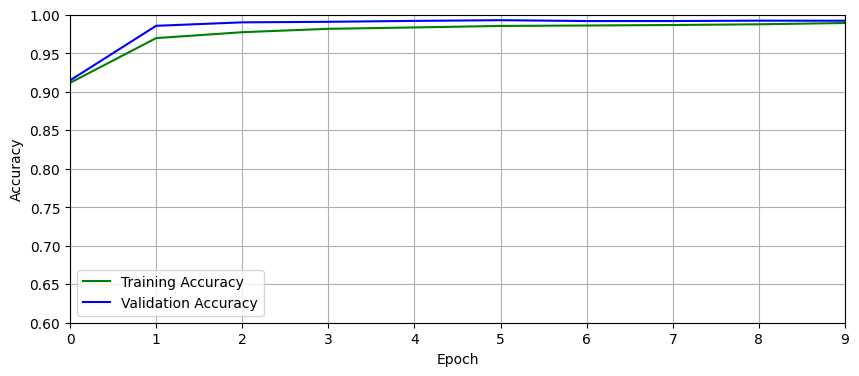

In [54]:
for sz in filter_sizes :
    for cnt in filter_nums :

        model = Sequential()
        # model.add(Resizing(32, 32, input_shape = (28, 28, 3)))

        model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
        model.add(BatchNormalization())
        model.add(MaxPool2D(strides = 2))
        model.add(Dropout(0.5))

        model.add(Conv2D(cnt, sz, activation = 'relu'))
        model.add(BatchNormalization())
        model.add(MaxPool2D(strides = 2))
        model.add(Dropout(0.5))

        model.add(Flatten())

        model.add(Dense(128, activation = 'relu'))
        model.add(Dense(10, activation = 'softmax'))

        model.summary()

        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

        history = model.fit(x_train, y_train,
                            validation_data=(x_test, y_test),
                            epochs = EPOCHS,
                            batch_size = BATCH_SIZE
                            )

        train_loss = history.history["loss"]
        train_acc  = history.history["accuracy"]
        valid_loss = history.history["val_loss"]
        valid_acc  = history.history["val_accuracy"]

        plot_results([ train_loss, valid_loss ],
                    ylabel="Loss",
                    ylim = [0.0, 1.0],
                    metric_name=["Training Loss", "Validation Loss"],
                    color=["g", "b"]);

        plot_results([ train_acc, valid_acc ],
                    ylabel="Accuracy",
                    ylim = [0.6, 1.0],
                    metric_name=["Training Accuracy", "Validation Accuracy"],
                    color=["g", "b"])



# Visualize The results

In [52]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):

    fig, ax = plt.subplots(figsize=(10, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, EPOCHS-1])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

# Results

As we can see, we have achieved the accuracy of $99.22\%$ and loss of $0.0253$ with `kernel_size = (5, 5)` and `filters = 64` which is out best result so far.

# Dropout Yes or No?

## Without Dropout

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_25 (Ba  (None, 26, 26, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 9, 9, 64)          51264     
                                                                 
 batch_normalization_26 (Ba  (None, 9, 9, 64)          256       
 tchNormalization)                                               
                                                     

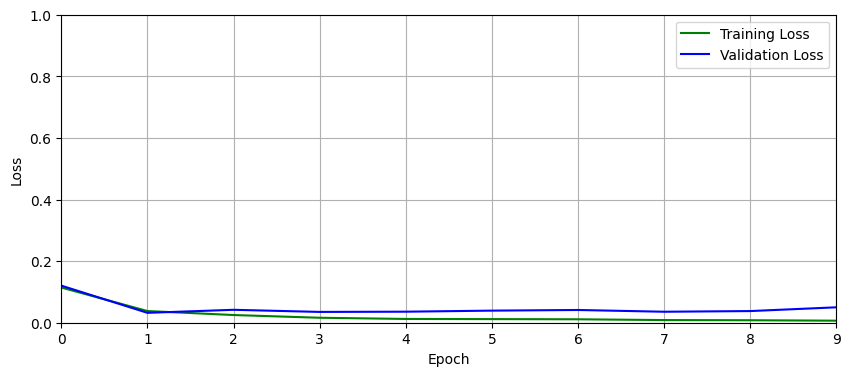

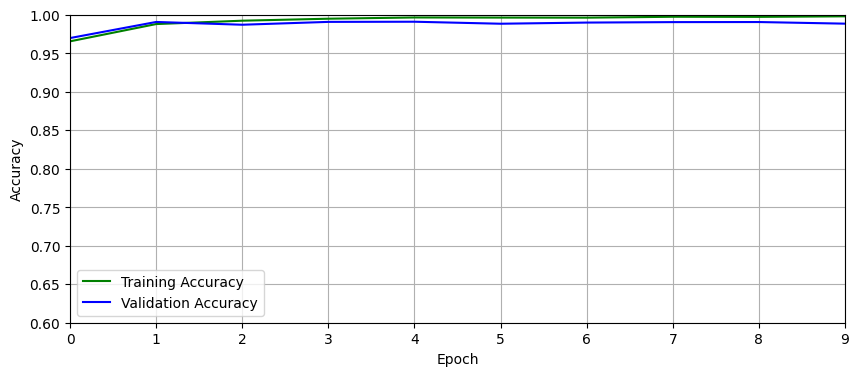

In [55]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D(strides = 2))
# model.add(Dropout(0.5))

model.add(Conv2D(64, (5, 5), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides = 2))
# model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    epochs = EPOCHS,
    batch_size = BATCH_SIZE
)

train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results([ train_loss, valid_loss ],
    ylabel="Loss",
    ylim = [0.0, 1.0],
    metric_name=["Training Loss", "Validation Loss"],
    color=["g", "b"]
);

plot_results([ train_acc, valid_acc ],
    ylabel="Accuracy",
    ylim = [0.6, 1.0],
    metric_name=["Training Accuracy", "Validation Accuracy"],
    color=["g", "b"]
);

## With Dropout

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_27 (Ba  (None, 26, 26, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_31 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_30 (Conv2D)          (None, 9, 9, 64)          51264     
                                                                 
 batch_normalization_28 (Ba  (None, 9, 9, 64)        

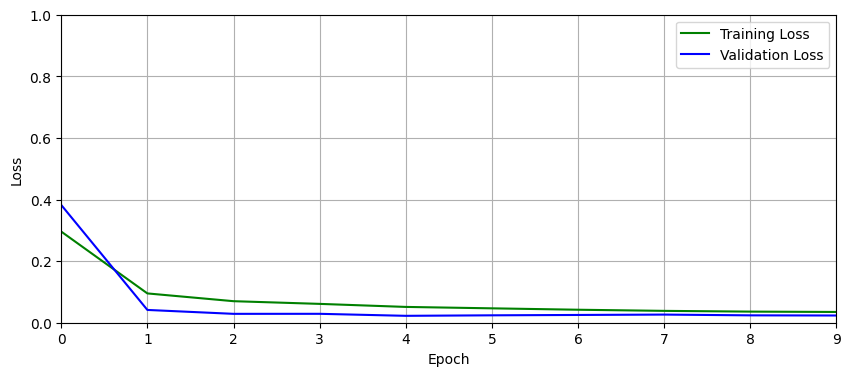

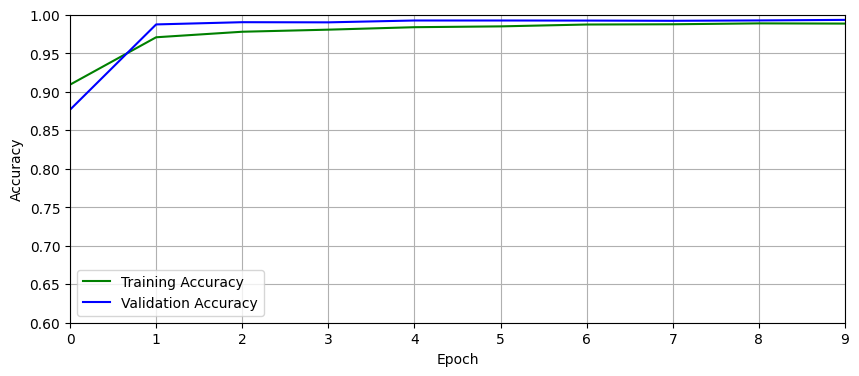

In [56]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D(strides = 2))
model.add(Dropout(0.5))

model.add(Conv2D(64, (5, 5), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides = 2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    epochs = EPOCHS,
    batch_size = BATCH_SIZE
)

train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results([ train_loss, valid_loss ],
    ylabel="Loss",
    ylim = [0.0, 1.0],
    metric_name=["Training Loss", "Validation Loss"],
    color=["g", "b"]
);

plot_results([ train_acc, valid_acc ],
    ylabel="Accuracy",
    ylim = [0.6, 1.0],
    metric_name=["Training Accuracy", "Validation Accuracy"],
    color=["g", "b"]
);

# Results

Here it is obvious that by using Dropout not only we decrease the rate of **overfitting** and increased **generalization** but also the validation accuracy **with Dropout** is $99.33\%$ while it's only $98.84\%$ **without Dropout**

which means using Dropout can be useful.

# VGG16

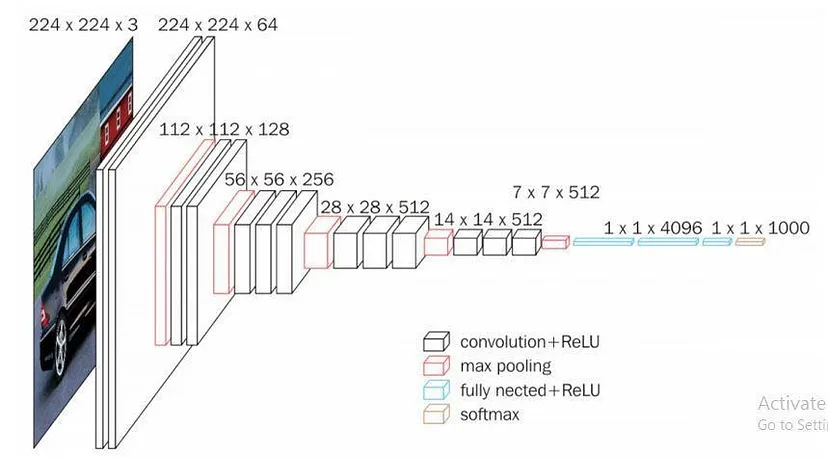

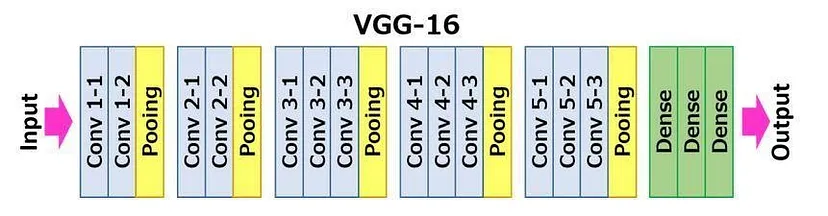

## Structure

*   The 16 in VGG16 refers to 16 layers that have weights. In VGG16 there are thirteen convolutional layers, five Max Pooling layers, and three Dense layers which sum up to 21 layers but it has only sixteen weight layers i.e., learnable parameters layer.

*   VGG16 takes input tensor size as 224, 244 with 3 RGB channel
*   Most unique thing about VGG16 is that instead of having a large number of hyper-parameters they focused on having convolution layers of 3x3 filter with stride 1 and always used the same padding and maxpool layer of 2x2 filter of stride 2.

*   The convolution and max pool layers are consistently arranged throughout the whole architecture

*   Conv-1 Layer has 64 number of filters, Conv-2 has 128 filters, Conv-3 has 256 filters, Conv 4 and Conv 5 has 512 filters.

*   Three Fully-Connected (FC) layers follow a stack of convolutional layers: the first two have 4096 channels each, the third performs 1000-way ILSVRC classification and thus contains 1000 channels (one for each class). The final layer is the soft-max layer.

In [64]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train = np.expand_dims(x_train, axis = -1)
x_test = np.expand_dims(x_test, axis = -1)

x_train = np.repeat(x_train, 3, axis = -1)
x_test = np.repeat(x_test, 3, axis = -1)

x_train = tf.image.resize(x_train, [32, 32])
x_test = tf.image.resize(x_test, [32, 32])

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



In [65]:
vgg_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (32, 32, 3))

In [66]:
vgg_base.trainable = False

In [67]:
model = Sequential()

model.add(vgg_base)

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_15 (Flatten)        (None, 512)               0         
                                                                 
 dense_41 (Dense)            (None, 128)               65664     
                                                                 
 batch_normalization_30 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_34 (Dropout)        (None, 128)               0         
                                                                 
 dense_42 (Dense)            (None, 10)                1290      
                                                     

Epoch 1/10
469/469 [==============================] - 68s 23ms/step - loss: 0.5105 - accuracy: 0.8386 - val_loss: 0.2133 - val_accuracy: 0.9317
Epoch 2/10
469/469 [==============================] - 9s 19ms/step - loss: 0.2586 - accuracy: 0.9178 - val_loss: 0.1763 - val_accuracy: 0.9431
Epoch 3/10
469/469 [==============================] - 9s 19ms/step - loss: 0.2207 - accuracy: 0.9305 - val_loss: 0.1594 - val_accuracy: 0.9487
Epoch 4/10
469/469 [==============================] - 9s 19ms/step - loss: 0.2051 - accuracy: 0.9338 - val_loss: 0.1608 - val_accuracy: 0.9472
Epoch 5/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1919 - accuracy: 0.9382 - val_loss: 0.1486 - val_accuracy: 0.9516
Epoch 6/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1824 - accuracy: 0.9412 - val_loss: 0.1547 - val_accuracy: 0.9500
Epoch 7/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1781 - accuracy: 0.9425 - val_loss: 0.1431 - val_accuracy: 0.952

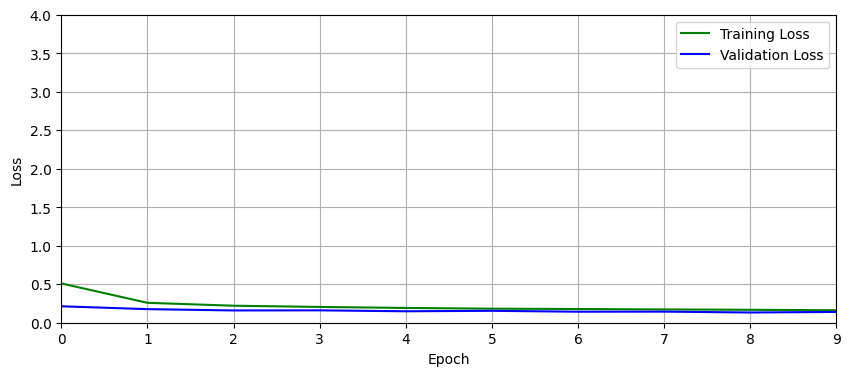

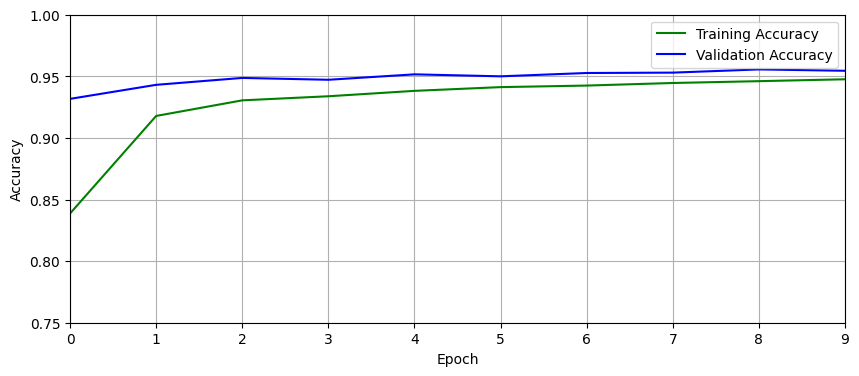

In [68]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    epochs = EPOCHS,
    batch_size = BATCH_SIZE
)

train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results([ train_loss, valid_loss ],
    ylabel="Loss",
    ylim = [0.0, 0.4],
    metric_name=["Training Loss", "Validation Loss"],
    color=["g", "b"]
);

plot_results([ train_acc, valid_acc ],
    ylabel="Accuracy",
    ylim = [0.75, 1.0],
    metric_name=["Training Accuracy", "Validation Accuracy"],
    color=["g", "b"]
);

# Results

At first glance the result might be unexpected due to the fact that we only were able to achieve an accuracy of $95.45\%$ on the validation set while we were able to achieve accuracy of more than $99\%$ in our own custom CNN model despite the fact that the VGG16 model is much stronger and was trained on a huge dataset like *Imagenet*.

The main idea and the key difference is perhaps that VGG16 model although is great and really powerful, it was not trained on this dataset but rather on a competely different dataset, also due to its deep structure the high-level and complex features that it has extracted, may not be useful for classifying hand-written digits dataset like MNIST while on the other hand our custom CNN has learned the somewhat high-level features specific to hand-written digits or as some would say our model was ***fine-tuned*** for this specific task.

What is the solution you may ask? ***Transfer Learning!***

# Transfer Learning

In transfer learning in CNN, we utilize the early and central layers, while only retraining the latter layers. The model leverages labeled data from its original training task. In our example, if a model originally trained to identify backpacks in images now needs to detect sunglasses, it uses its prior learning.

So the idea is based on the fact that the few first layers of CNN only extracts low-level and **frequent** features, these are mostly seen in all different types of images and classes and are not specific, while the last few layers of CNN are mostly **task-specific** resulting in only training the last few layers of the pre-trained model **fine-tunes** the model for the specific task and considerably increases the accuracy.